In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fastai import *
from fastai.vision.all import *


import sys
sys.path.append('..')
from src.band_plotters import *
from src.Tiff32Image import TiffImage, load_tiff_uint16_image

sys.path.append('/notebooks/Beta-VAE/')
from model import BetaVAE_B

latent_length=64

In [2]:
model = BetaVAE_B(z_dim=latent_length, nc=3)

checkpoint = torch.load("/notebooks/Beta-VAE/checkpoints/BW_B_gamma100_z{0}/last".format(latent_length))
model.load_state_dict(checkpoint['model_states']['net'])

model.eval()

/notebooks/Beta-VAE/model.py:191: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)


BetaVAE_B(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): View()
    (9): Linear(in_features=512, out_features=256, bias=True)
    (10): ReLU(inplace=True)
    (11): Linear(in_features=256, out_features=256, bias=True)
    (12): ReLU(inplace=True)
    (13): Linear(in_features=256, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU(inplace

FileNotFoundError: [Errno 2] No such file or directory: '/storage/2dmatpedia/images/no_dos_bw/low_dpi_bands/2dm-1.tiff'

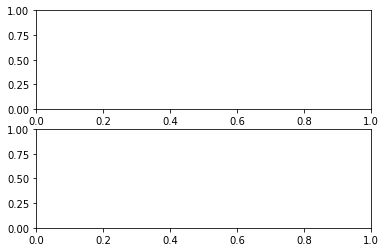

In [4]:
view_prediction("2dm-1", model, -7, 7, image_directory="../../../storage/2dmatpedia/images/no_dos_bw/low_dpi_bands", width=64, height=64, height_mode="pad", act_func=F.sigmoid)